In [1]:
import pandas as pd
#https://www.kaggle.com/datasets/karthickveerakumar/startup-logistic-regression

In [2]:
df_startup = pd.read_csv("resources/resources/50_Startups.csv") #1. adımda Verileri okuduk

In [3]:
df_startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df_startup.info() # Hiçbir null alan yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df_startup.describe().T # 0 alan içeren sütunları silmek daha mantıklı çünkü min max değer arası bu kadar fazla olmaması gerekiyor.

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [6]:
market_zero_indexes=df_startup[df_startup["Marketing Spend"]==0].index

In [7]:
df_startup.drop(market_zero_indexes,inplace=True)

In [8]:
rd_spend_indexes=df_startup[df_startup["R&D Spend"]==0].index

In [9]:
df_startup.drop(rd_spend_indexes,inplace=True)

In [10]:
df_startup.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,46.0,78241.718043,43695.348335,1000.23,46117.0325,74661.715,111370.9775,165349.20
Administration,46.0,121947.043478,26812.767940,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,46.0,228393.083261,111336.691801,1903.93,142431.3850,239452.750,302423.7675,471784.10
Profit,46.0,117063.925217,35960.003971,49490.75,96537.8325,108643.015,143590.9300,192261.83


In [11]:
df_X = df_startup.drop("Profit",axis=1)
df_y = df_startup["Profit"]
df_startup=df_X.join(df_y)
df_startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [12]:
df_startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.196068,0.708253,0.977703
Administration,0.196068,1.000000,-0.085831,0.135076
Marketing Spend,0.708253,-0.085831,1.000000,0.732277
Profit,0.977703,0.135076,0.732277,1.000000


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: >

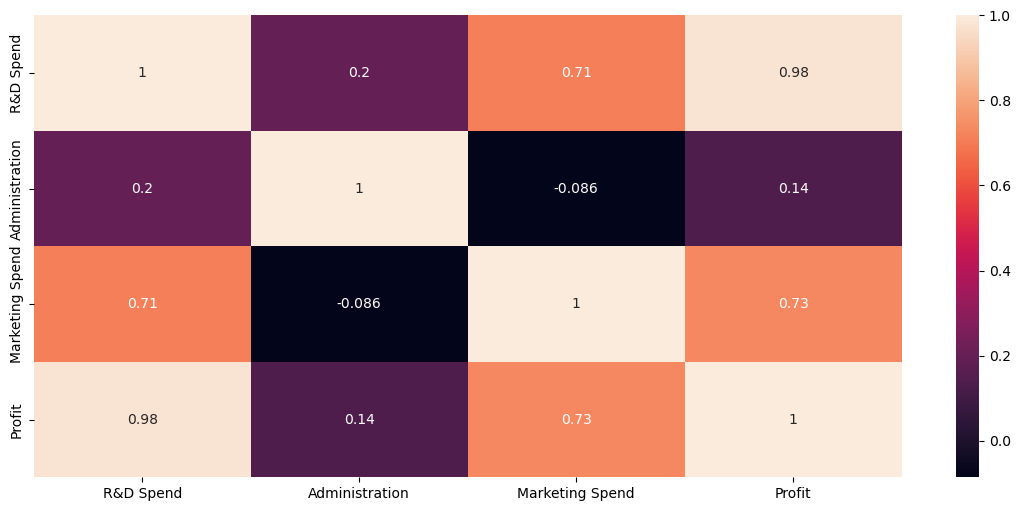

In [16]:
plt.figure(figsize=(14,6))
sns.heatmap(df_startup.corr(),annot=True)

In [17]:
df_startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [21]:
df_startup["State"].unique() # Elimiz de sözel veri var bu verileri sayısala dönüştürmemiz gerekiyor

array(['New York', 'California', 'Florida'], dtype=object)

In [24]:
state_digital=pd.get_dummies(df_startup["State"])
state_digital

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [25]:
df_startup.drop("State",axis=1,inplace=True) # Sözel verileri içeren sütunu sildik

In [26]:
df_startup=df_startup.join(state_digital)
df_startup

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [33]:
df_X = df_startup.drop("Profit",axis=1)
df_y = df_startup["Profit"]
df_startup = df_X.join(df_y) #X ve y (giriş-çıkış) değerlerini güncelledim
df_startup

,R&D Spend,Administration,Marketing Spend,California,Florida,New York,Profit
0,165349.20,136897.80,471784.10,0,0,1,192261.83
1,162597.70,151377.59,443898.53,1,0,0,191792.06
2,153441.51,101145.55,407934.54,0,1,0,191050.39
3,144372.41,118671.85,383199.62,0,0,1,182901.99
4,142107.34,91391.77,366168.42,0,1,0,166187.94
5,131876.90,99814.71,362861.36,0,0,1,156991.12
6,134615.46,147198.87,127716.82,1,0,0,156122.51
7,130298.13,145530.06,323876.68,0,1,0,155752.60
8,120542.52,148718.95,311613.29,0,0,1,152211.77
9,123334.88,108679.17,304981.62,1,0,0,149759.96


<AxesSubplot: >

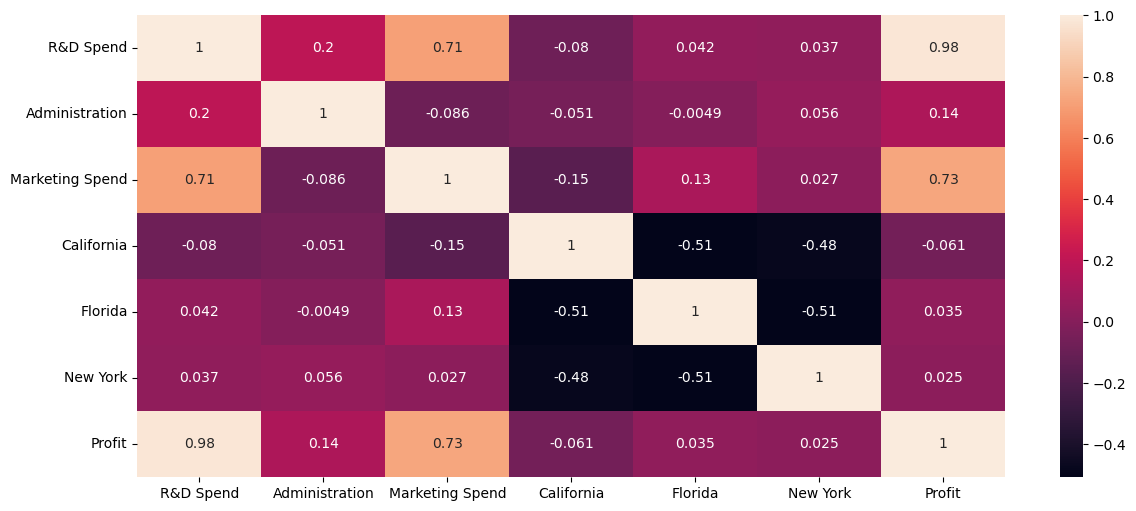

In [34]:
plt.figure(figsize=(14,6))
sns.heatmap(df_startup.corr(),annot=True) #korelasyon katsayılarını bu şekilde bulduk.

In [35]:
from sklearn.model_selection import train_test_split #train ve test verilerini oluşturan modeli sağlar

In [36]:
X = df_startup.drop("Profit",axis=1) #x(giriş) verileri
y = df_startup["Profit"] #y(çıkış) verileri
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) # test ve train verilerini oluşturduk

In [37]:
from sklearn.linear_model import LinearRegression # modelimizde linear regresyon modelini kullanacağız.

In [38]:
model = LinearRegression()

In [39]:
model.fit(X_train,y_train) # modelimizi train verilerle eğittik

LinearRegression()

In [40]:
y_predict=model.predict(X_test) #train verilerle eğittimiz modelimizi test giriş verileriyle->test çıkış verilerini 
#tahmin ettirmeye çalışıyoruz

In [42]:
from sklearn.metrics import r2_score # modelimizin doğruluğunu r^2 ile ölçeceğiz

In [43]:
r2_score(y_test,y_predict) # modelimiz verileri %93 oranda doğru tahmin edebiliyor

0.9385926603829022

<AxesSubplot: xlabel='Profit'>

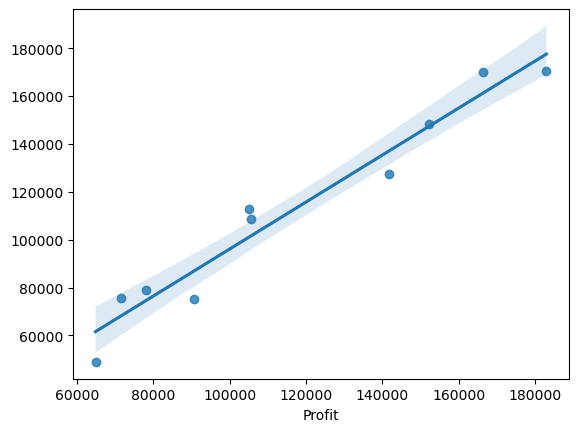

In [46]:
sns.regplot(x=y_test,y=y_predict)

In [44]:
y_predict #modelimizin aşşağıdaki verileri tahmin ettiği veriler 

array([ 78934.51581113, 108773.81681548, 112985.26662189,  48934.05695492,
        75312.70885203,  75816.41828965, 170187.68132042, 127275.86865172,
       148222.30597197, 170600.92765981])

In [45]:
y_test #gerçekte olması gereken veriler

40     78239.91
26    105733.54
27    105008.31
45     64926.08
36     90708.19
42     71498.49
4     166187.94
12    141585.52
8     152211.77
3     182901.99
Name: Profit, dtype: float64